In [1]:
using Pkg
using JLD2, FileIO
using LaTeXStrings

In [2]:
cwd = pwd()
cd(cwd * "/data/data_1000000")

In [3]:
using ColorSchemes
using Plots
palette(:default)
colors = palette(:default)
println(colors)

ColorPalette(ColorScheme{Vector{RGB{Float64}}, String, String}(RGB{Float64}[RGB{Float64}(0.0,0.6056031611752245,0.9786801175696073), RGB{Float64}(0.8888735002725198,0.43564919034818994,0.2781229361419438), RGB{Float64}(0.2422242978521988,0.6432750931576305,0.3044486515341153), RGB{Float64}(0.7644401754934356,0.4441117794687767,0.8242975359232758), RGB{Float64}(0.6755439572114057,0.5556623322045815,0.09423433626639477), RGB{Float64}(4.821181644776295e-7,0.6657589812923561,0.6809969518707945), RGB{Float64}(0.930767491919665,0.3674771896571412,0.5757699667547829), RGB{Float64}(0.7769816661712932,0.5097431319944513,0.1464252569555497), RGB{Float64}(3.8077343661790943e-7,0.6642678029460116,0.5529508754522481), RGB{Float64}(0.558464964115081,0.5934846564332882,0.11748125233232104), RGB{Float64}(5.947623898072685e-7,0.6608785231434254,0.7981787608414297), RGB{Float64}(0.6096707676128648,0.49918492100827777,0.9117812665042642), RGB{Float64}(0.3800016049820351,0.5510532724353506,0.9665056985227

In [4]:
include("rho_sampling.jl")

# Monte Carlo average test
N_hist_all = [10, 10^2, 10^3, 10^4, 10^5, 10^6]
n_hr_attempts = 10
c_avg_nh = zeros(length(N_hist_all))
c_std_nh = zeros(length(N_hist_all))

for i_n in 1:length(N_hist_all)
    n_h = N_hist_all[i_n]
    c_avg_test = 0
    c_m2 = 0
    for i in 1:n_hr_attempts
        c_dist_i, c_avg_i = plot_concurrence_distribution(n_h)
            #println(c_avg_i)
            c_avg_test += c_avg_i[1]/(n_hr_attempts*n_h)
            c_m2 += sum((c_dist_i).^2)/((n_hr_attempts)*(n_h))
            #push!(c_dist, c_dist_i)
    c_avg_nh[i_n] = c_avg_test
    c_std_nh[i_n] = sqrt.(c_m2 .- c_avg_test^2)/sqrt((n_h-1)*(n_hr_attempts-1))
    end
end


save("concurrence_average_hr_n.jld2", "N_hist_all", N_hist_all, "c_avg_nh", c_avg_nh, "c_std_nh", c_std_nh)


  1.535949 seconds (4.60 M allocations: 230.302 MiB, 6.04% gc time, 99.08% compilation time)
10;  0.037678144128785104
  0.000453 seconds (3.18 k allocations: 298.375 KiB)
10;  0.015310507133584695
  0.000619 seconds (3.18 k allocations: 298.719 KiB)
10;  0.039881027185072394
  0.000544 seconds (3.19 k allocations: 300.438 KiB)
10;  0.048782975843227626
  0.000446 seconds (3.21 k allocations: 303.531 KiB)
10;  0.0034733645656303547
  0.000438 seconds (3.17 k allocations: 297.688 KiB)
10;  0.0
  0.000442 seconds (3.20 k allocations: 302.156 KiB)
10;  0.005437269965694924
  0.000436 seconds (3.18 k allocations: 298.719 KiB)
10;  0.0
  0.000457 seconds (3.23 k allocations: 307.312 KiB)
10;  0.13386822691754033
  0.000439 seconds (3.21 k allocations: 304.906 KiB)
10;  0.1642899267795585
  0.004922 seconds (32.18 k allocations: 2.984 MiB)
100;  0.04418222772607554
  0.004666 seconds (32.27 k allocations: 2.999 MiB)
100;  0.1186068357205182
  0.004686 seconds (32.14 k allocations: 2.978 MiB)

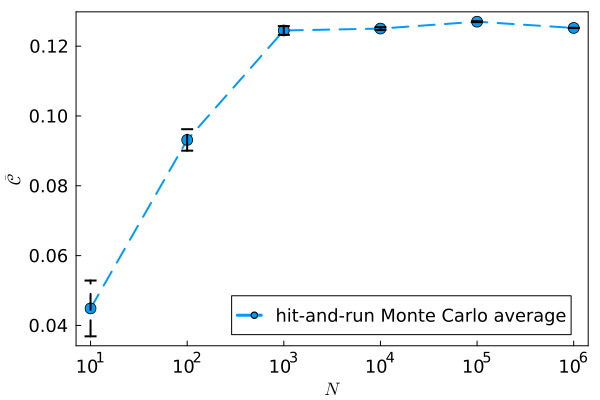

[0.04487214425190939, 0.09313320113285661, 0.12448372412325726, 0.12502923296864066, 0.12700062816720603, 0.12521276696040662]
[0.007991946843137535, 0.0030793156413360147, 0.0012549199158895178, 0.00038980882928289697, 0.00012576637202188062, 3.947143384682059e-5]


"/home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000/concurrence_average_hr_n.pdf"

In [5]:

# Loads data from Monte Carlo computatio of average concurrence

data_hr_n = load("concurrence_average_hr_n.jld2")
N_hist_all = data_hr_n["N_hist_all"]
c_avg_nh = data_hr_n["c_avg_nh"]
c_std_nh = data_hr_n["c_std_nh"]
println(c_avg_nh)
println(c_std_nh)

# Creates a plot for the Monte Carlo average convergence

p_hr_convergence = plot(N_hist_all, c_avg_nh, label="hit-and-run Monte Carlo average", color=colors[1], lw=2, linestyle=:dash, marker=:circle, yerr=c_std_nh, 
fmt=:errorbar, ebar_linewidth=1, ebar_color=colors[1], ebar_alpha=0.5,  markersize = 6, xaxis=:log10, xticks=[10, 10^2, 10^3, 10^4, 10^5, 10^6], legend=:bottomright,
xtickfontsize=12,ytickfontsize=12, xguidefontsize=12,yguidefontsize=12,legendfontsize=12, framestyle=:box, grid=false)
xlabel!(L"N")
ylabel!(L"\bar{\mathcal{C}}")
display(p_hr_convergence)
savefig("concurrence_average_hr_n.pdf")

In [6]:
include("rho_sampling.jl")
N_hist = 10^6
c_dist = []
c_avg = 0

n_hr_attempts = 10

#for i in 1:n_hr_attempts
#   c_dist_i, c_avg_i = plot_concurrence_distribution(N_hist)
#    println(c_avg_i)
#    c_avg += c_avg_i[1]/(n_hr_attempts*N_hist)
#    push!(c_dist, c_dist_i)
#end

c_dist = collect(c_dist)
# Save values to files
#save("c_dist.jld2", "c_dist", c_dist)
#save("c_avg.jld2", "c_avg", c_avg)
c_dist = load("c_dist.jld2", "c_dist")
c_avg = load("c_avg.jld2", "c_avg")

c_mean = 0
c_var = 0
for c_arr in c_dist
    #println(sum(c_arr)/N_hist)
    c_mean += sum(c_arr)/(N_hist)
    #c_var += sum(c_mean^2) 
end


i=1
for c_arr in c_dist
    mean_i = sum(c_arr)/N_hist
    #println((mean_i - c_mean/10)^2)
    c_var += 1/(n_hr_attempts-1)*(mean_i - c_mean/n_hr_attempts)^2
end

#println(c_var)
#println(sqrt(c_var)/sqrt(10))
#c_mean = c_mean
c_std = sqrt(c_var)/sqrt((n_hr_attempts))
println(c_std)
println(c_mean/n_hr_attempts)
#println(c_mean)
#c_var = sum(c_dist.^2)/N_hist .- c_mean^2

0.00016149408273478043
0.1257014800535109


In [7]:
# Load files
N = 1000000
n = 1000000
# Load asymptotes
cwd = pwd()
println(cwd)
#cd(cwd)
#cd(cwd * "/data/data_1810")
println(readdir())
asymp_dict = Dict()
purif_dict_1 = Dict()

for i in 1:10
    println(i)
    asymp_1 = jldopen("data_asymptotes_" * string(n) * "_false_" * string(i) * ".jld2", "r")  # open read-only (default)

    asymp_dict[string(N) * "_" * string(i)] = asymp_1

    #println(sqrt(asymp_1["deutsch"][1]*(1-asymp_1["deutsch"][1]))/sqrt(n))
    #println(sqrt.((asymp_1["deutsch"][1] - (asymp_1["deutsch"][1])^2/(n^2))))
    #println(sqrt.((asymp_1["mfi"][1] - (asymp_1["mfi"][1])^2/(n^2))))
    #println(sqrt.((asymp_1["cnot"][1] - (asymp_1["cnot"][1])^2/(n^2))))
    #println(sqrt.((1-asymp_1["general"][1] - (1-asymp_1["general"][1])^2))/sqrt(n))

    # Load purification arrays
    N_array = [n, ]

    for N in N_array
        purif_1 = jldopen("data_purification_" * string(N) * "_" * string(i) * "_false.jld2", "r") # open read-only (default
        purif_dict_1[string(N) * "_" * string(i)] = purif_1
    end

end


#println(purif_dict_1[string(N_array[1])]["mfi"])
print(asymp_dict)

/home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000
["Average_concurrence_and_prob_protocols.pdf", "Average_concurrence_optimized.pdf", "Average_fidelities_AA.pdf", "Average_fidelities_protocols.pdf", "Average_initial_concurrence_dist.pdf", "Average_purification_AA.pdf", "Average_success_probability.pdf", "Average_success_probability_optimized.pdf", "C_distribution_start.pdf", "C_distributionsBennettIteration1.gif", "C_distributionsBennettIteration1.pdf", "C_distributionsBennettIteration10.pdf", "C_distributionsBennettIteration11.pdf", "C_distributionsBennettIteration12.pdf", "C_distributionsBennettIteration13.pdf", "C_distributionsBennettIteration14.pdf", "C_distributionsBennettIteration15.pdf", "C_distributionsBennettIteration2.pdf", "C_distributionsBennettIteration3.pdf", "C_distributionsBennettIteration4.pdf", "C_distributionsBennettIteration5.pdf", "C_distributionsBennettIteration6.pdf", "C_distributionsBennettIteration7.pdf", "C_distributionsBennettIteration8.pdf"

In [8]:
function std_min(x_avg, x, dims=2)
    u = x[x .< x_avg]
    return sqrt(sum((u .- x_avg, dims).^2)/abs(n - 1))

end

function std_max(x_avg, x, dims=2)
    u = x[x .> x_avg]
    #println(length(u))
    return sqrt(sum((u .- x_avg, dims).^2)/abs(n - 1))  
end

#std_max(0.1, purif_dict_1[string(n)]["bennet"], 2)

std_max (generic function with 2 methods)

In [9]:
function myfind(c)
    a = similar(c, Int)
    count = 1
    @inbounds for i in eachindex(c)
        a[count] = i
        count += (c[i] != zero(eltype(c)))
    end
    return resize!(a, count-1)
end

myfind (generic function with 1 method)

In [21]:
# Calculates statistical averages and standard deviations from the data generated by the HR algorithm.

n_iter = 15

# Mean concurrence of algorithms
mean_bennett_aa = zeros(n_iter)
mean_deutsch_aa = zeros(n_iter)
mean_mfi_aa = zeros(n_iter)
mean_cnot_aa = zeros(n_iter)

# Mean probabilities of algorithms
bennett_prob_aa = zeros(n_iter)
deutsch_prob_aa = zeros(n_iter)
mfi_prob_aa = zeros(n_iter)
cnot_prob_aa = zeros(n_iter)

# Variance of concurrence of algorithms
var_bennett_aa = zeros(n_iter)
var_deutsch_aa = zeros(n_iter)
var_mfi_aa = zeros(n_iter)
var_cnot_aa = zeros(n_iter)

# Variance of probabilities of algorithms
var_prob_bennett_aa = zeros(n_iter)
var_prob_deutsch_aa = zeros(n_iter)
var_prob_mfi_aa = zeros(n_iter)
var_prob_cnot_aa = zeros(n_iter)

# Mean fidelity of algorithms
mean_bennett_f = zeros(2, n_iter)
mean_deutsch_f = zeros(2, n_iter)
mean_mfi_f = zeros(2, n_iter)
mean_cnot_f = zeros(2, n_iter)

# Variance of fidelity of algorithms
var_bennett_f = zeros(2, n_iter)
var_deutsch_f = zeros(2, n_iter)
var_mfi_f = zeros(2, n_iter)
var_cnot_f = zeros(2, n_iter)

# Asymptotics 
asymp_bennet = 0
asymp_deutsch = 0
asymp_mfi = 0
asymp_cnot = 0
asymp_general = 0

n_zeros_bennett = 0
n_zeros_deutsch = 0
n_zeros_mfi = 0
n_zeros_cnot = 0

for i in 1:n_hr_attempts

    # Loads data from JULIA files

    u_bennett = purif_dict_1[string(n)* "_" * string(i)]["bennett"][1]
    u_deutsch = purif_dict_1[string(n)* "_" * string(i)]["deutsch"][1]
    u_mfi = purif_dict_1[string(n)* "_" * string(i)]["mfi"][1]
    u_cnot = purif_dict_1[string(n)* "_" * string(i)]["cnot"][1]

    p_bennett = purif_dict_1[string(n)* "_" * string(i)]["bennett"][2]
    p_deutsch = purif_dict_1[string(n)* "_" * string(i)]["deutsch"][2]
    p_mfi = purif_dict_1[string(n)* "_" * string(i)]["mfi"][2]
    p_cnot = purif_dict_1[string(n)* "_" * string(i)]["cnot"][2]

    f_bennett = purif_dict_1[string(n) * "_" * string(i)]["bennett"][3]
    #print(size(f_bennett))
    f_deutsch = purif_dict_1[string(n) * "_" * string(i)]["deutsch"][3]
    f_mfi = purif_dict_1[string(n) * "_" * string(i)]["mfi"][3]
    #println(f_mfi)
    f_cnot = purif_dict_1[string(n) * "_" * string(i)]["cnot"][3]

    n_zeros_bennett += sum(u_bennett .== 0)/n_iter
    n_zeros_deutsch += sum(u_deutsch .== 0)/n_iter
    n_zeros_mfi += sum(u_mfi .== 0)/n_iter
    n_zeros_cnot += sum(u_cnot .== 0)/n_iter

    mean_bennett_aa += sum(u_bennett, dims=2)
    mean_deutsch_aa += sum(u_deutsch, dims=2)
    mean_mfi_aa += sum(u_mfi, dims=2)
    mean_cnot_aa += sum(u_cnot,dims=2)

    var_bennett_aa += sum(u_bennett.^2, dims=2)
    var_deutsch_aa += sum(u_deutsch.^2, dims=2)
    var_mfi_aa += sum(u_mfi.^2, dims=2)
    var_cnot_aa += sum(u_cnot.^2,dims=2)

    bennett_prob_aa += sum(p_bennett, dims=2)
    deutsch_prob_aa += sum(p_deutsch, dims=2)
    mfi_prob_aa += sum(p_mfi, dims=2)
    cnot_prob_aa += sum(p_cnot,dims=2)

    var_prob_bennett_aa += sum(p_bennett.^2, dims=2)
    var_prob_deutsch_aa += sum(p_deutsch.^2, dims=2)
    var_prob_mfi_aa += sum(p_mfi.^2, dims=2)
    var_prob_cnot_aa += sum(p_cnot.^2,dims=2)

    mean_bennett_f += sum(f_bennett, dims=3)
    mean_deutsch_f += sum(f_deutsch, dims=3)
    mean_mfi_f += sum(f_mfi, dims=3)
    mean_cnot_f += sum(f_cnot,dims=3)
    #println(mean_mfi_f)

    var_bennett_f += sum(f_bennett.^2, dims=3)
    var_deutsch_f += sum(f_deutsch.^2, dims=3)
    var_mfi_f += sum(f_mfi.^2, dims=3)
    var_cnot_f += sum(f_cnot.^2,dims=3)

    asymp_bennet += asymp_dict[string(n)* "_" * string(i)]["bennett"][1]
    asymp_deutsch += asymp_dict[string(n)* "_" * string(i)]["deutsch"][1]
    asymp_mfi += asymp_dict[string(n)* "_" * string(i)]["mfi"][1]
    asymp_cnot += asymp_dict[string(n)* "_" * string(i)]["cnot"][1]
    asymp_general += asymp_dict[string(n)* "_" * string(i)]["general"][1]

    #var_asymp_bennet += asymp_dict[string(n)* "_" * string(i)]["bennett"][2]
    #var_asymp_deutsch += asymp_dict[string(n)* "_" * string(i)]["deutsch"][2]
    #var_asymp_mfi += asymp_dict[string(n)* "_" * string(i)]["mfi"][2]
    #var_asymp_cnot += asymp_dict[string(n)* "_" * string(i)]["cnot"][2]
    #var_asymp_general += asymp_dict[string(n)* "_" * string(i)]["general"][2]

end


asymp_aa = [asymp_bennet/n_hr_attempts; asymp_deutsch/n_hr_attempts; asymp_mfi/n_hr_attempts; asymp_cnot/n_hr_attempts; asymp_general/n_hr_attempts]
#println(mean_mfi_f)

# Variance of asymptotics (var = p *( 1 - p)/n)
err_asymp_aa = sqrt.((asymp_aa .* (ones(5) - asymp_aa))*(n*n_hr_attempts)/((n-1)*(n_hr_attempts - 1)))/sqrt(n*n_hr_attempts)
std_asymp_aa = err_asymp_aa*sqrt(n_hr_attempts*n)
println(asymp_aa)
println(err_asymp_aa)
#println(std_asymp_aa)


plot_aa = [mean_bennett_aa; mean_deutsch_aa; mean_mfi_aa; mean_cnot_aa]  # plot of all the means_aa
n_zeros = [n_zeros_bennett; n_zeros_deutsch; n_zeros_mfi; n_zeros_cnot]
#println(mean_mfi_aa/10)

plot_fid = [mean_bennett_f; mean_deutsch_f; mean_mfi_f; mean_cnot_f]  # plot of all the means_aa
#println(plot_fid)

m2_plot_fid = [var_bennett_f; var_deutsch_f; var_mfi_f; var_cnot_f]  # plot of all the standard deviations
err_plot_fid = sqrt.((m2_plot_fid*n/(n_hr_attempts-1)) - (plot_fid/(n_hr_attempts-1)).^2)/sqrt(n*n_hr_attempts)

prob_aa = [bennett_prob_aa; deutsch_prob_aa; mfi_prob_aa; cnot_prob_aa]  # plot of all the probabilities

m2_plot_aa = [var_bennett_aa; var_deutsch_aa; var_mfi_aa; var_cnot_aa]  # plot of all the standard deviations
m2_prob_aa = [var_prob_bennett_aa; var_prob_deutsch_aa; var_prob_mfi_aa; var_prob_cnot_aa]  # plot of all the standard deviations

err_plot_aa = sqrt.((m2_plot_aa*n/(n_hr_attempts-1)) - (plot_aa/(n_hr_attempts-1)).^2)/sqrt(n*n_hr_attempts)
err_prob_aa = sqrt.((m2_prob_aa*n/(n_hr_attempts-1)) - (prob_aa/(n_hr_attempts-1)).^2)/sqrt(n*n_hr_attempts)
std_plot_aa = err_plot_aa*sqrt(n_hr_attempts*n)
std_prob_aa = err_prob_aa*sqrt(n_hr_attempts*n)
#println(reshape(plot_aa, 15, 4))
#println(reshape(prob_aa, 15, 4))

plot_aa = reshape(plot_aa, 15, 4)
prob_aa = reshape(prob_aa, 15, 4)
err_plot_aa = reshape(err_plot_aa, 15, 4)
err_prob_aa = reshape(err_prob_aa, 15, 4)
#std_dev_aa = (std_bennet_min_aa, std_deutsch_min_aa, std_mfi_min_aa, std_cnot_min_aa, 
#std_bennet_max_aa, std_deutsch_max_aa, std_mfi_max_aa, std_cnot_max_aa)

#std_dev_ab = (std_bennet_min_ab, std_deutsch_min_ab, std_mfi_min_ab, std_cnot_min_ab, 
#std_bennet_max_ab, std_deutsch_max_ab, std_mfi_max_ab, std_cnot_max_ab)

#err_asymp_aa = [std_asymp_bennet; std_asymp_deutsch; std_asymp_mfi; std_asymp_cnot; std_asymp_general]


[0.0186526, 0.0709295, 0.2127868, 0.21325779999999997, 0.7569131]
[4.509828626694615e-5, 8.556905718535951e-5, 0.00013642610749433606, 0.00013653614845658942, 0.00014298245542887538]


15×4 Matrix{Float64}:
 2.53142e-5  5.00181e-5  1.83242e-5  3.66868e-5
 2.55691e-5  4.60818e-5  1.8741e-5   3.74826e-5
 2.58881e-5  4.81774e-5  2.00606e-5  4.01019e-5
 2.62845e-5  5.10968e-5  2.09508e-5  4.18589e-5
 2.67711e-5  5.44835e-5  2.29791e-5  4.58973e-5
 2.73578e-5  5.85986e-5  2.48493e-5  4.96409e-5
 2.80498e-5  6.35844e-5  2.67311e-5  5.34154e-5
 2.88451e-5  6.81047e-5  2.84986e-5  5.69715e-5
 2.97339e-5  7.20989e-5  2.98051e-5  5.96036e-5
 3.06989e-5  7.54294e-5  3.0847e-5   6.1701e-5
 3.17174e-5  7.79395e-5  3.16215e-5  6.32596e-5
 3.27635e-5  7.98532e-5  3.21691e-5  6.43601e-5
 3.38114e-5  8.12788e-5  3.2574e-5   6.51725e-5
 3.48372e-5  8.23051e-5  3.28605e-5  6.57467e-5
 3.58209e-5  8.30528e-5  3.30635e-5  6.61538e-5

In [22]:
function new_plot(titlefontsize=18,
    guidefontsize=30,
    tickfontsize=16,
    legendfontsize=18, size=(950,950), legend=:topright)
    plot(xlims = (0,Inf), ylims = (0, Inf), legend=legend,
        titlefontsize=titlefontsize,
        guidefontsize=guidefontsize,
        tickfontsize=legendfontsize,
        legendfontsize=legendfontsize,
        grid=false, size = size)
end

new_plot (generic function with 7 methods)

In [31]:
# Plot asymptotes and mean concurrence for non-optimized protocols.

using Plots


sb_aa = asymp_aa[1]
sd_aa = asymp_aa[2]
sm_aa = asymp_aa[3]
scnot_aa = asymp_aa[4]
println(sb_aa)


names_array = ["bennett" "deutsch" "mfi" "cnot" "mfi-2"]
plot_names = ["Bennett" "Deutsch" "MFI-based" "CNOT-based" "MFI-2"]
markers = Plots.supported_markers()
linestyles = Plots.supported_styles()
purif_iter = 15
x = range(0, purif_iter)
x_ticks = 0:1:purif_iter
p1 = new_plot()
print(colors[1])


for i in 1:4
    y_aa = append!([c_avg,], plot_aa[:,i]/n_hr_attempts)
    println(y_aa/n_hr_attempts)
    plot!(x, y_aa, linewidth=2, label=plot_names[i], c=colors[i], xticks = x_ticks, markershape = :auto, 
    markersize = 8,
    markercolor = colors[i],
    markerstrokecolor = colors[i],
    yerror=err_plot_aa[:,i])
    annotate!(1.8, 0.285, text(L"(a)", color, :right, 25))
    hline!([asymp_aa[i],], linestyle=:dash, linewidth=2, label=nothing, c=colors[i],  xticks = x_ticks)   
end

xlabel!(L"i")
ylabel!(L"\bar{\mathcal{C}}")
ylims!(0, 0.30)
xlims!(0, 15.2)

#savefig("Average_purification_AA.pdf")

p2 = new_plot()
#println(size(prob_aa))
x_new = range(1, purif_iter)
K = 1
for i in 1:4
    #if i == 3
    #    K = 2 # This factor comes from fact
    #else
    #    K = 1
    #end
    println(prob_aa[:,i])
    plot!(x_new, K*prob_aa[:,i]/n_hr_attempts, linewidth=2, c=colors[i], xticks = x_ticks, markershape = :auto, label=nothing,
    markersize = 8,
    markercolor = colors[i],
    markerstrokecolor = colors[i], yerror=err_prob_aa[:,i])
    println(asymp_aa[i])
    annotate!(2.6, 0.104, text(L"(b)", color, :right, 25))

    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end
#hline!([s], linestyle=:dash, label="purifiable states", c="blue")
#title!("Comparison of protocols for random density matrices ")
ylims!(0, 0.11)
xlims!(1, 15.2)
xlabel!(L"i")
ylabel!(L"\bar{P}_s")

plot!(p1, p2, layout=(1, 2), size=(1600, 750), margin = 1Plots.cm, framestyle = :box)
#savefig("Average_concurrence_and_prob_protocols.pdf")




0.0186526
RGB{Float64}(0.0,0.6056031611752245,0.9786801175696073)[0.012570148005351254, 0.00019274100150410353, 0.00023119334092239771, 0.0002763362357753113, 0.0003286741867294126, 0.00038843341706898567, 0.00045546578267043996, 0.0005291897477052094, 0.0006085877969382569, 0.0006922661401311788, 0.0007785666401968502, 0.0008657091822801956, 0.0009519388936264356, 0.0010356557373645172, 0.0011155108566899261, 0.0011904623428468752]
[0.012570148005351254, 0.0007881223602768519, 0.0012053720965092124, 0.0017351267404691472, 0.0023459061345428617, 0.0030434236175003637, 0.0037874845985035517, 0.004468902487842559, 0.005068452986516822, 0.005565577913011512, 0.005950198815556937, 0.006245633192258104, 0.00646650882129895, 0.0066274039193026215, 0.006744557536209113, 0.006828450731099786]
[0.012570148005351254, 0.004028143614760921, 0.004890135257853985, 0.006556334012499404, 0.008839376039386369, 0.011052828366104994, 0.013215384606988425, 0.015159130199546858, 0.016683950208048477, 0.017

┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components

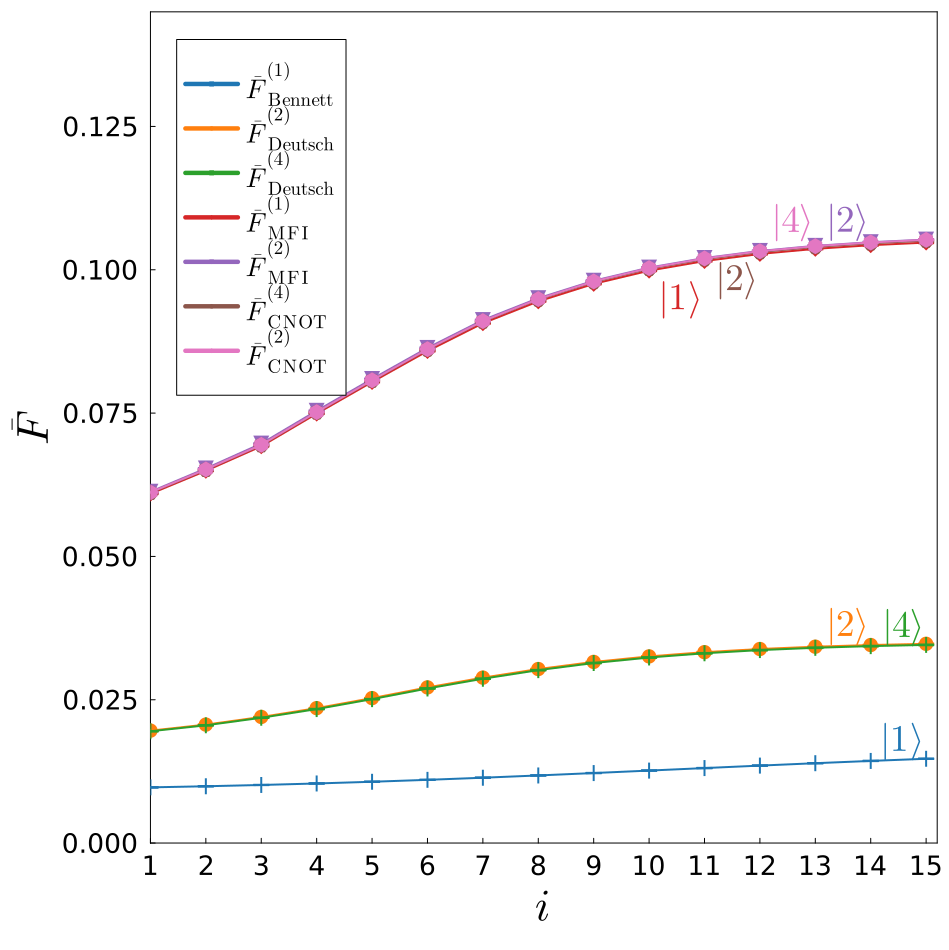

0.0186526
(8, 15, 1)

In [28]:
# Plots of the fidelities

using Plots
using LaTeXStrings


sb_aa = asymp_aa[1]
sd_aa = asymp_aa[2]
sm_aa = asymp_aa[3]
scnot_aa = asymp_aa[4]
println(sb_aa)


names_array = ["bennett" "deutsch" "mfi" "cnot" "mfi-2"]
names = [L"\bar{F}^{(1)}_{\textrm{Bennett}}", "", L"\bar{F}^{(2)}_{\textrm{Deutsch}}", L"\bar{F}^{(4)}_{\textrm{Deutsch}}", L"\bar{F}^{(1)}_{\textrm{MFI}}", L"\bar{F}^{(2)}_{\textrm{MFI}}", L"\bar{F}^{(4)}_{\textrm{CNOT}}", L"\bar{F}^{(2)}_{\textrm{CNOT}}"]
states = [L"\vert 1 \rangle", "", L"\vert 2 \rangle", L"\vert 4 \rangle",L"\vert 1 \rangle",L"\vert 2 \rangle",L"\vert 2 \rangle",L"\vert 4 \rangle"]

markers = Plots.supported_markers()
linestyles = Plots.supported_styles()
purif_iter = 15
x = range(1, purif_iter)
x_ticks = 0:1:purif_iter
p1 = new_plot()
print(size(plot_fid))
cur_colors = palette(:tab10)
yp_shift = [0.003, 0.003, 0.003, 0.003, -0.01, 0.003, -0.007, 0.003]
xp_shift = [0, 0, -1, 0, -4, -1, -3, -2]

for i in 1:8
    if i != 2
        y_f = plot_fid[i, :]/n_hr_attempts

        # Average fidelity

        if i > 2
            color = cur_colors[i-1]
        else
            color = cur_colors[i]
        end

        plot!(x, y_f, linewidth=2, xticks = x_ticks, markershape = :auto, 
        markersize = 8,yerror=err_plot_fid[i, :], labels=names[i], color=color,
                markercolor = color,
                markerstrokecolor = color, legend=:topleft, framestyle = :box)
        xpos = 15 + xp_shift[i]
        ypos = plot_fid[i, 15]/n_hr_attempts + yp_shift[i]

        if i != 2
        annotate!(xpos, ypos, text(states[i], color, :right, 25))
        end
 
    end 
end


xlabel!(L"i")
ylabel!(L"\bar{F}")
ylims!(0, 0.145)
xlims!(1, 15.2)

savefig("fig6.pdf")

display(p1) 
#display(p2) 

In [15]:
# Load data from the optimized protocols
using DelimitedFiles
#using Pkg; Pkg.add("HDF5")
using HDF5

main_folder = "/home/francesco/PhD/ConcurrenceProject/ppt-newton/data/"
data_folders_name = ["projector_and_argmax_policy", "unitaries_alone", "projector_and_zeropolicy"]

data_folders = [main_folder * data_folders_name[i] for i in 1:3]


data_c = zeros(3, 16, 10)
data_p = zeros(3, 16, 10)
data_var_c = zeros(3, 16, 10)
data_var_p = zeros(3, 16, 10)
data_all_c = zeros(3, 16, 1000000)

for j in 1:3
    for i in 1:10
        data_c_i = readdlm(data_folders[j] * "/gtc_mean_test" * string(i) * ".txt")
        data_p_i = readdlm(data_folders[j] * "/gtp_mean_test" *  string(i)  * ".txt")
        data_c_var_i = readdlm(data_folders[j] * "/gtc_var_test" *  string(i)  * ".txt")
        data_p_var_i = readdlm(data_folders[j] * "/gtp_var_test" *  string(i) * ".txt")
        data1 = h5read(data_folders[j] * "/all_c_test" *  string(i) * ".hdf5", "all_c_test")
        data_c[j, :, i] = data_c_i
        data_p[j, :, i] = data_p_i
        data_var_c[j, :, i] = data_c_var_i
        data_var_p[j, :, i] = data_p_var_i
        data_all_c[j, :, :] = data1

    end
end


println(size(data_c))
#print(data_c[1, :, 1])


(3, 15, 10)


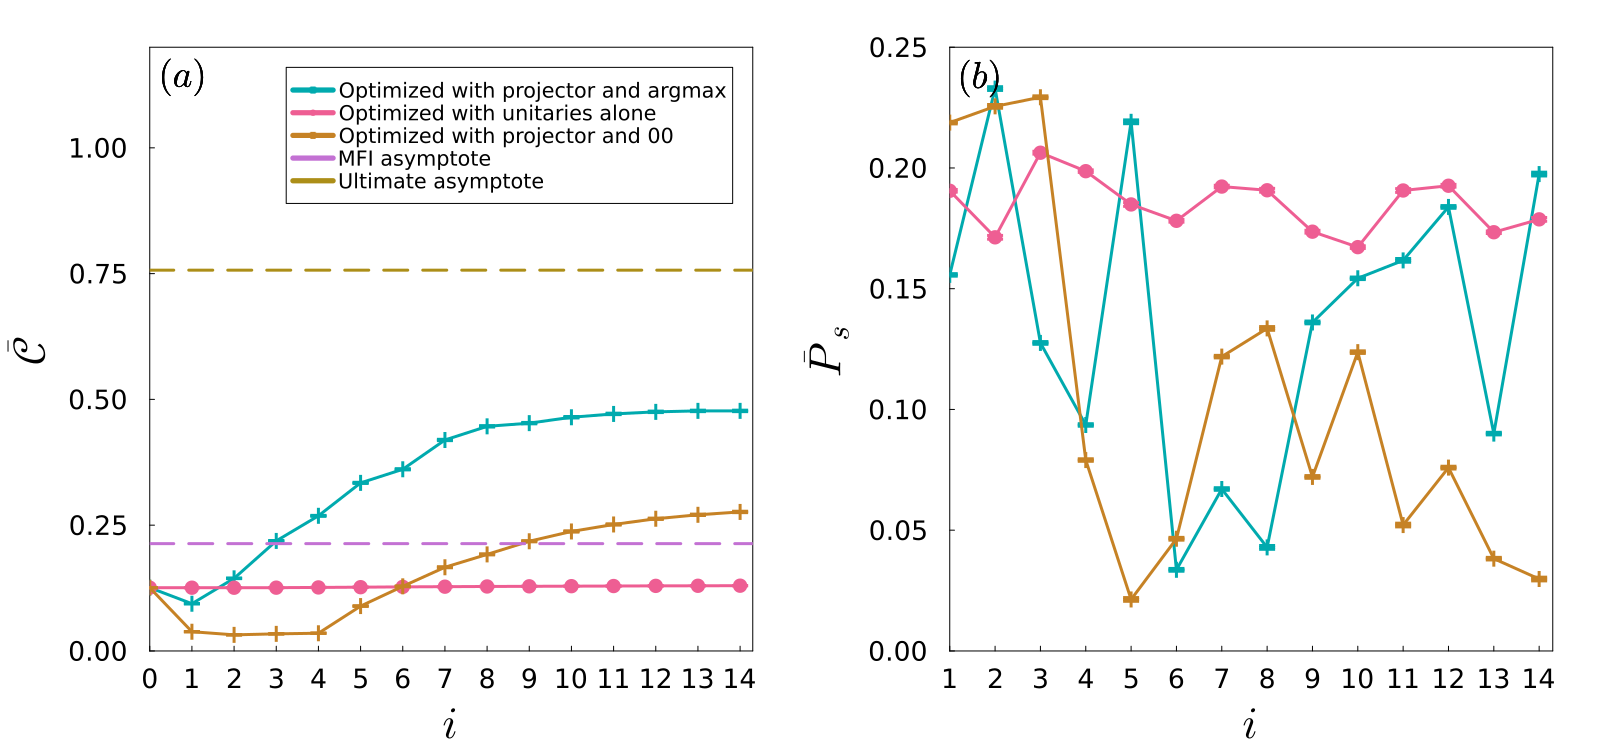

(15,)
(15,)
(15,)
4
5
[0.0186526, 0.0709295, 0.2127868, 0.21325779999999997, 0.7569131]


┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280


"/home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000/fig2.pdf"

In [17]:
# Plot optimized protocol vs MFI

markers = Plots.supported_markers()
linestyles = Plots.supported_styles()
purif_iter = 16
n_plots = 3
x = range(0, purif_iter-1)
x_ticks = 0:1:purif_iter
p1 = new_plot()
plot_names_2 = ["Optimized with projector and argmax", "Optimized with unitaries alone", "Optimized with projector and 00"]
plot_names_3 = ["MFI asymptote", "Ultimate asymptote"]
n_color_shift = 5

for i in 1:n_plots
    av_c = sum(data_c[i, :, :], dims=2)/n_hr_attempts
    println(size(x))
    av_c_err = sqrt.(sum(data_var_c[i, :, :], dims=2))
    plot!(x, av_c, linewidth=3, label=plot_names_2[i], c=colors[n_color_shift+i], xticks = x_ticks, markershape = :auto, 
    markersize = 8,
    markercolor = colors[n_color_shift+i],
    markerstrokecolor = colors[n_color_shift+i], yerr=av_c_err, legendfontsize=14)
    annotate!(1.4, 1.14, text(L"(a)", color, :right, 25))
    #hline!([asymp_aa[i],], linestyle=:dash, linewidth=2, label=nothing, c=colors[i],  xticks = x_ticks)   
end

for i in [4, 5]
    println(i)
    hline!([asymp_aa[i],], linestyle=:dash, label=plot_names_3[i-3],
    linewidth=3, c=colors[i],  xticks = x_ticks)   
end
ylims!((0.0,1.2))
xlims!(0, 15.3)

xlabel!(L"i")
ylabel!(L"\bar{\mathcal{C}}")
println(asymp_aa)
savefig("Average_concurrence_optimized.pdf")

p2 = new_plot()
#println(size(prob_aa))
x_new = range(0, purif_iter-1)

for i in 1:n_plots
    av_p = sum(data_p[i, :, :], dims=2)/n_hr_attempts
    avp_err = sqrt.(sum(data_var_p[:, :, i], dims=2))
    #println(size(data_p[:, i, :]))
    plot!(x_new, av_p, linewidth=3, c=colors[n_color_shift+i], xticks = x_ticks, markershape = :auto, label=nothing,
    markersize = 8,
    markercolor = colors[n_color_shift+i],
    markerstrokecolor = colors[n_color_shift+i], yerr=avp_err)
    annotate!(2.2, 0.237, text(L"(b)", color, :right, 25))
    #println(asymp_aa[i])
    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end
#hline!([s], linestyle=:dash, label="purifiable states", c="blue")
#title!("Comparison of protocols for random density matrices ")
xlabel!(L"i")
ylabel!(L"\bar{P}_s")
xlims!(1, 15.3)
ylims!(0, 0.25)
p12 = plot(p1, p2, layout = (1,2), size=(1600, 750), margin = 1Plots.cm, framestyle = :box) 
display(p12) 
savefig("fig2.pdf")


In [30]:
# Plots of the sample variances for optimized and non-optimized protocols

p3 = new_plot()
x = range(0, purif_iter-1)
println(size(x))
N = 10^6

for i in 1:4
    println(c_std)
    y_err_c = append!([c_std,], err_plot_aa[:,i])
    print(size(y_err_c))
    plot!(x, (y_err_c*sqrt(n*n_hr_attempts)).^2, linewidth=2, label=plot_names[i], c=colors[i], xticks = x_ticks, markershape = :auto, 
    markersize = 8,
    markercolor = colors[i],
    markerstrokecolor = colors[i])
    println(asymp_aa[i])
    annotate!(1.4, 0.285, text(L"(a)", color, :right, 25))
    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end
xlabel!(L"i")
ylabel!(L"s^2_{\mathcal{C}}")
savefig("Var_concurrence.pdf")
xlims!(0, 15.2)
ylims!(0, 0.3)
p4 = new_plot()
x_new = range(1, purif_iter-1)
println("Hi")
println(size(err_prob_aa))

for i in 1:4
    #if i == 3
    #    K = 4 # This factor comes from fact
    #else
    #    K = 1
    #end
    plot!(x_new, (err_prob_aa[:,i]*sqrt(n_hr_attempts*n)).^2, linewidth=2, c=colors[i], xticks = x_ticks, markershape = :auto, label=nothing,
    markersize = 8,
    markercolor = colors[i],
    markerstrokecolor = colors[i])
    annotate!(2.2, 0.066, text(L"(b)", color, :right, 25))
    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end

xlabel!(L"i")
ylabel!(L"s^2_{P_s}")
xlims!(1, 15.2)
ylims!(0, 0.07)
#savefig("Variance_concurrence_and_prob_protocols.pdf")
#display(p34)

p5 = new_plot()
data_std_c = sqrt.(sum(data_var_c, dims=3)*N/n_hr_attempts)
x5 = range(0, purif_iter-1)
println(c_std)

for i in 1:3
    y_err_c = append!([c_std*sqrt(n*10),], data_std_c[i, begin:(purif_iter-1)])
    println(y_err_c)
    plot!(x5, (y_err_c).^2, linewidth=2, label=plot_names_2[i], c=colors[n_color_shift+i], xticks = x_ticks, markershape = :auto, 
    markersize = 8,
    markercolor = colors[n_color_shift+i],
    markerstrokecolor = colors[n_color_shift+i], legendfontsize=14)
    #println(asymp_aa[i])
    annotate!(1.4, 0.38, text(L"(c)", color, :right, 25))
    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end
ylims!(0, 0.4)
xlabel!(L"i")
ylabel!(L"s^2_{\mathcal{C}}")

p6 = new_plot()
data_std_p = sqrt.(sum(data_var_p, dims=3)*N/n_hr_attempts)
x6 = range(1, purif_iter-1)
#println(size(data_std_p))
#println(size(x6))

for i in 1:3
    y_err_p = data_std_p[i, begin:(purif_iter-1), :]
    plot!(x6, (y_err_p).^2, linewidth=2, c=colors[n_color_shift+i], label=nothing, xticks = x_ticks, markershape = :auto, 
    markersize = 8,
    markercolor = colors[n_color_shift+i],
    markerstrokecolor = colors[n_color_shift+i])
    println(asymp_aa[i])
    annotate!(2.4, 0.042, text(L"(d)", color, :right, 25))
    #hline!([asymp_ab[i]/n,], linestyle=:dash, linewidth=2, c=colors[i], label=plot_names[i], xticks = x_ticks)   
end
xlims!(1, 15.2)
xlabel!(L"i")
ylabel!(L"s^2_{P_s}")

p34 = plot(p3, p4, layout=(1, 2), size=(1650, 750), margin = 1Plots.cm, framestyle = :box)
savefig("fig3ab.pdf")
p56 = plot(p5, p6, layout=(1, 2), size=(1650, 750), margin = 1Plots.cm, framestyle = :box)
savefig("fig3cd.pdf")

(15,)
0.00016149408273478043
(16,)0.0186526
0.00016149408273478043
(16,)0.0709295
0.00016149408273478043
(16,)0.2127868
0.00016149408273478043
(16,)0.21325779999999997


┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280


BoundsError: BoundsError: attempt to access 15-element UnitRange{Int64} at index [1:16]

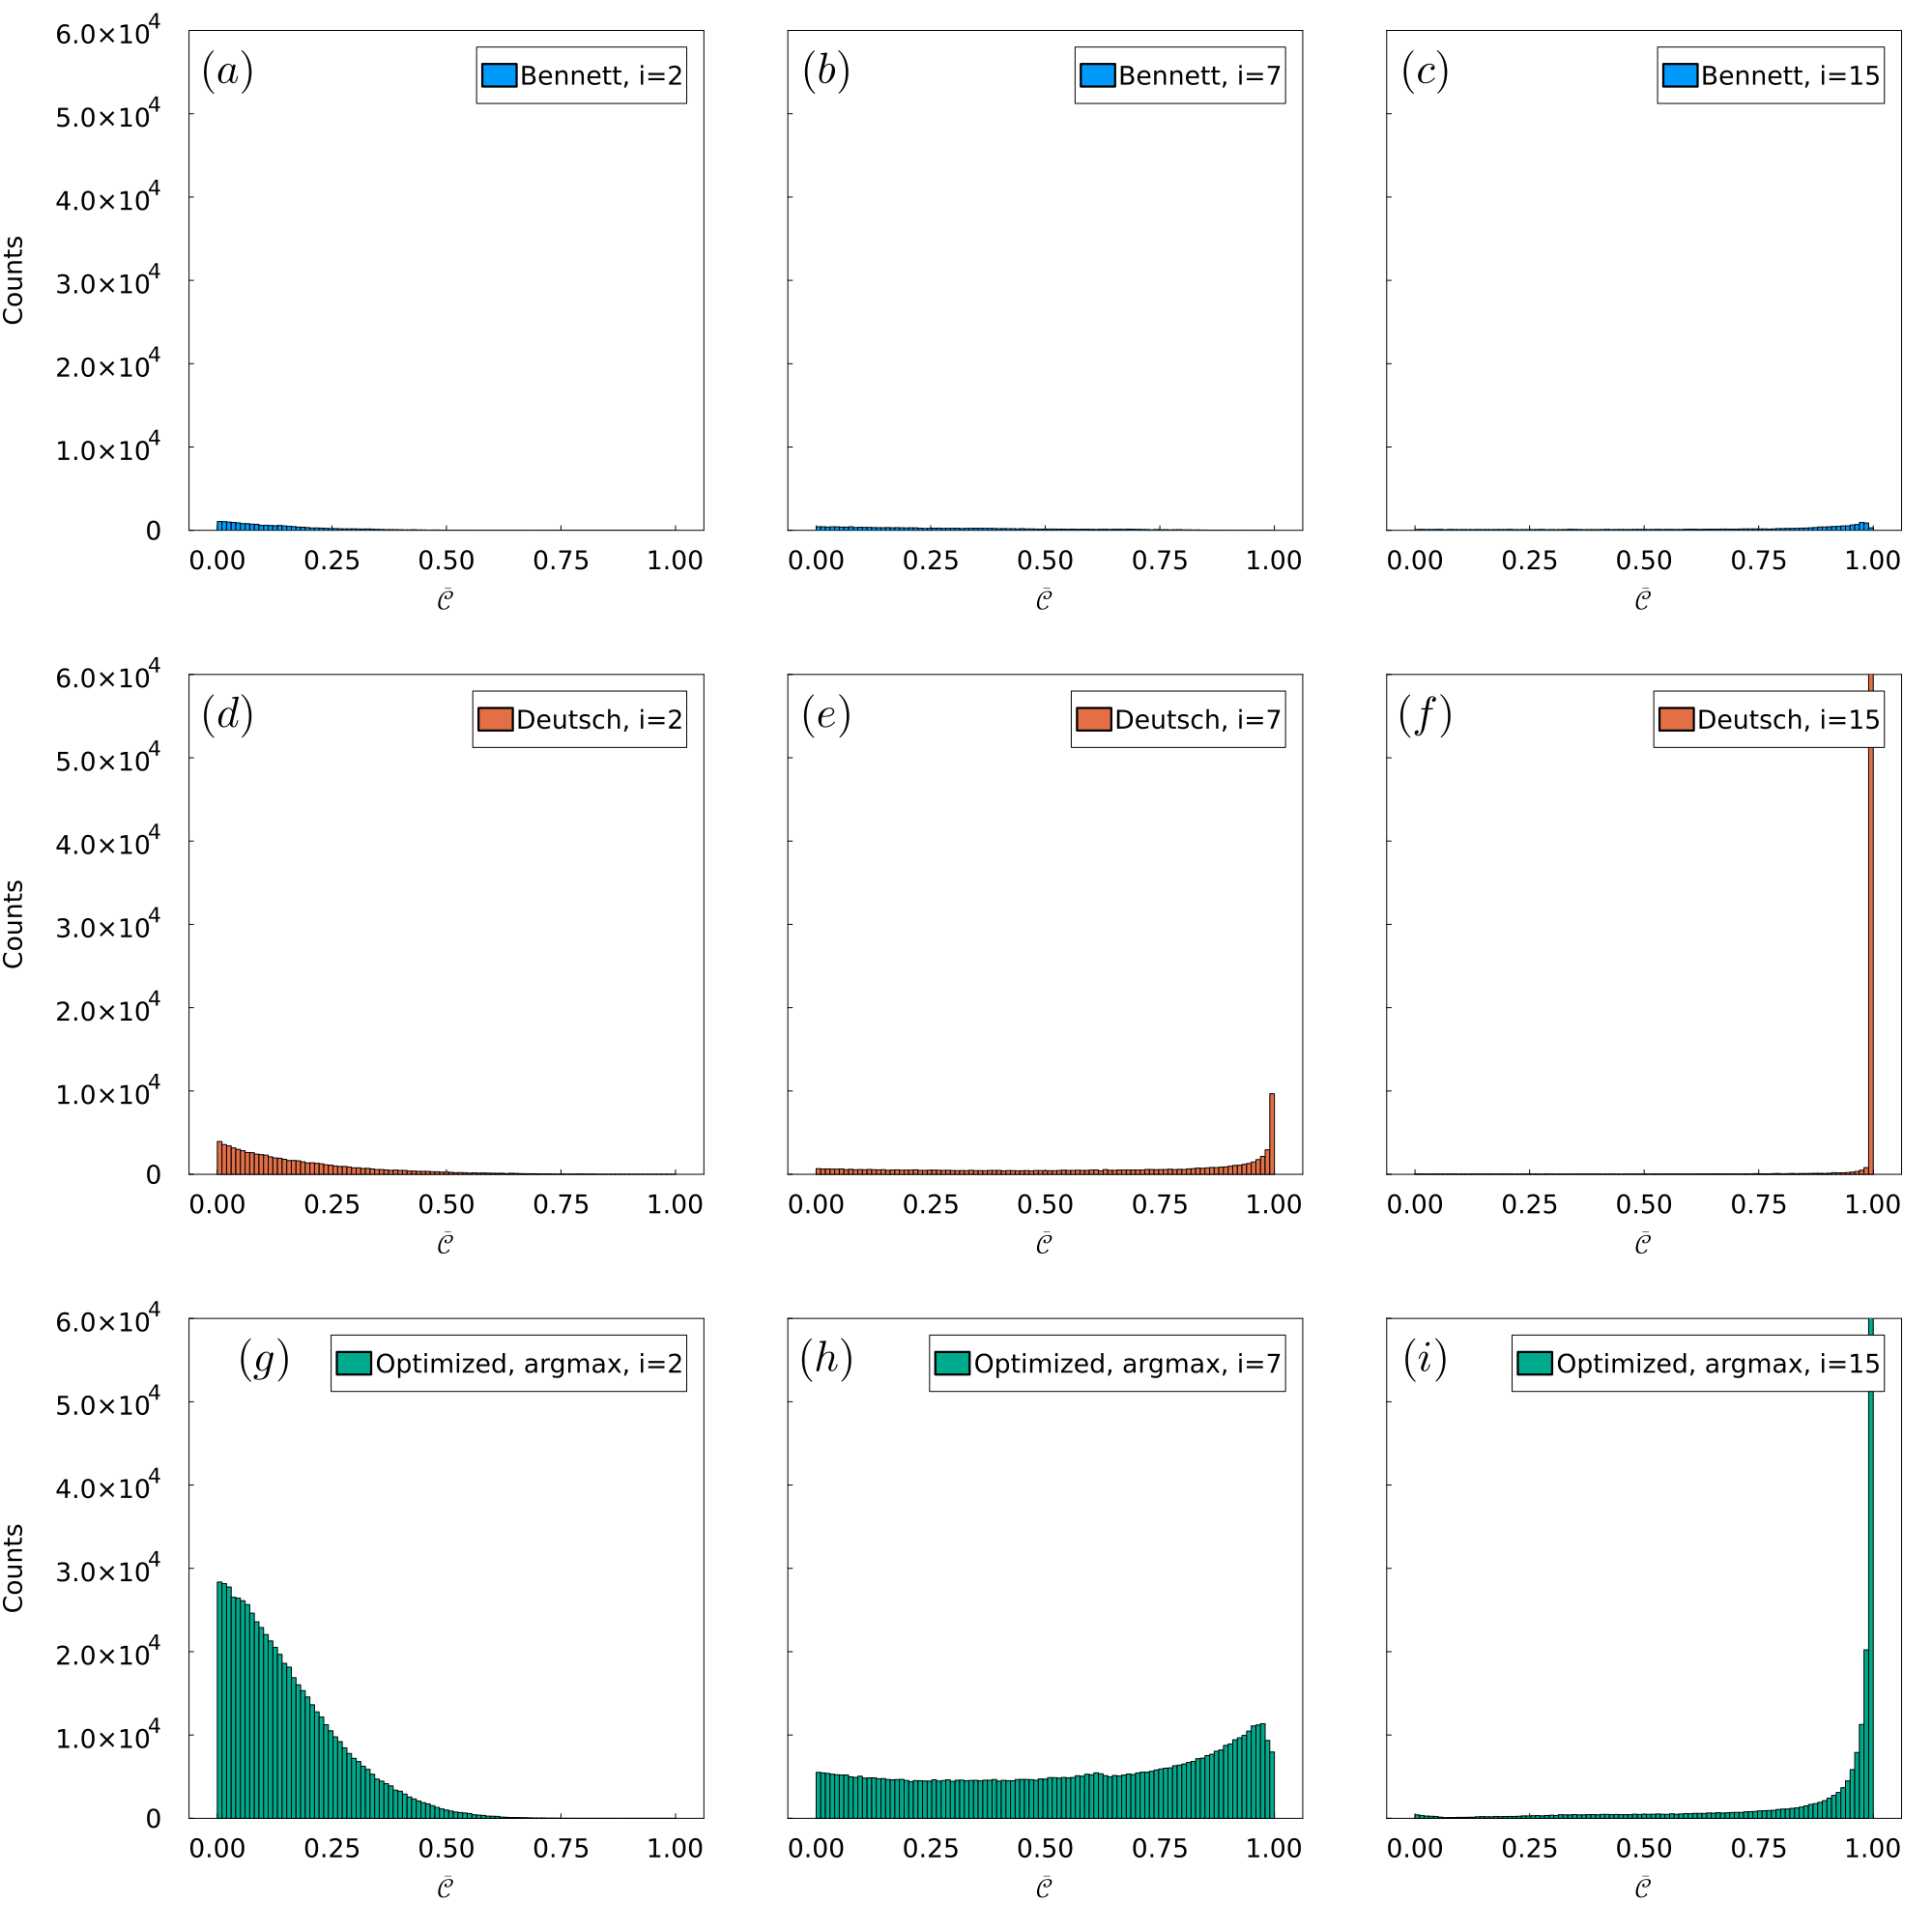

(15, 1000000)
(16, 1000000)
(10,)
0.12570148005351253
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(17280,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(71010,)
(754778,)
(618772,)
(618772,)
(618772,)
(593241,)
(580065,)
(565837,)
(554577,)
(551947,)
(549538,)
(540046,)
(532884,)
(531851,)
(527809,)
(521628,)


┌ Info: Saved animation to /home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000/C_distributionsBennettIteration1.gif
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/animation.jl:156
┌ Info: Saved animation to /home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000/C_distributionsDeutschIteration1.gif
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/animation.jl:156
┌ Info: Saved animation to /home/francesco/PhD/ConcurrenceProject/ppt-newton/data/data_1000000/C_distributionsOptimized, argmaxIteration1.gif
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/animation.jl:156


In [103]:
# Plot histograms of the concurrence

include("rho_sampling.jl")
idx = 1

bennett_cvals = purif_dict_1[string(n) * "_" * string(idx)]["bennett"][1]*n
deutsch_cvals = purif_dict_1[string(n) * "_" * string(idx)]["deutsch"][1]*n
mfi_cvals = purif_dict_1[string(n) * "_" * string(idx)]["mfi"][1]*n
cnot_cvals = purif_dict_1[string(n) * "_" * string(idx)]["cnot"][1]*n
optimized_c_vals = data_all_c[1, :, :]
println(size(cnot_cvals))
println(size(optimized_c_vals))

idx = 1
b_range = range(0, 1, length=100)
# Load c_dist, c_avg from file 
c_dist = load("c_dist.jld2", "c_dist")
c_avg = load("c_avg.jld2", "c_avg")
#c_dist, c_avg = plot_concurrence_distribution(N_hist)
#xlabel!("Concurrence")
#ylabel!("Counts")
p = new_plot()
new_c_dist = zeros(N_hist)
println(size(c_dist))

for i in 1:n_hr_attempts
    new_c_dist = (new_c_dist + c_dist[i])
end

histogram!(new_c_dist[new_c_dist .> 0]/n_hr_attempts, bins=b_range, label=false)
all_plots = []
push!(all_plots, p)
println(c_avg)

savefig(string("C_distribution_start.pdf"))
    distr_values = (bennett_cvals, deutsch_cvals, optimized_c_vals)
    protocol_names = ("Bennett", "Deutsch", "Optimized, argmax")
    latex_annotations = [L"(a)", L"(b)", L"(c)", L"(d)", L"(e)", L"(f)", L"(g)", L"(h)", L"(i)", L"(j)"]
    #colors=("deepskyblue3", "darkorange1", "springgreen", "darkmagenta", "aquamarine")
    #histogram!(c_dist[1, :], bins=b_range, label="Concurrence distribution")
    for i in eachindex(distr_values)
        if i == 3
            n_shift = 6
        else
            n_shift = 0
        end
        dv = distr_values[i]
        labelname = "Initial concurrence distribution"
        anim = @animate for idx in 1:(purif_iter-1)
                p = new_plot()
                dv_filtered = dv[idx,:]
                dv_filtered = dv_filtered[dv_filtered .> 0]
                println(size(dv_filtered))
                if idx == 2
                    k = 1
                elseif idx == 7
                    k = 2
                else
                    k = 3
                end
                note = text(latex_annotations[k + 3*(i-1)], 0.5, 0.5, :center, :center, 30)
                    
                if idx == 2
                    p = plot!(histogram(dv_filtered, bins=b_range, label=protocol_names[i] * ", i=" * string(idx), color=colors[i+n_shift]), labelfontsize=15) #,alpha=1/(1 + idx/2))
                    ylabel!("Counts")
                    if i == 3
                        annotate!(0.11, 55000, note)
                    else
                        annotate!(0.03, 55000, note)
                    end
                else
                    p = plot!(histogram(dv_filtered, bins=b_range, label=protocol_names[i] * ", i=" * string(idx), color=colors[i+n_shift]), labelfontsize=15, yformatter=(_...) -> "",
                    label=protocol_names[i] * ", i=" * string(idx)) #,alpha=1/(1 + idx/2))
                    annotate!(0.03, 55000, note)
                end
                xlabel!(L"\bar{\mathcal{C}}")
                ylims!(0, 60000)
                push!(all_plots, p)
                savefig(string("C_distributions", protocol_names[i], "Iteration", idx, ".pdf"))
            end
        gif(anim, string("C_distributions", protocol_names[i], "Iteration", idx, ".gif"), fps = 1)
    end



p_new = []
#println(size(all_plots))

for i in 1:3
    for j in 1:(purif_iter-1)
        #println(i, j)
        if j == 2 || j == 7 || j == 15
            #println(1 + (i-1)*(purif_iter-1) + j)
            push!(p_new, all_plots[1 + (i-1)*(purif_iter-1) + j])
        end
    end

end

conc_plots = plot(p_new[1:9]..., layout=(3,3), size=(2000, 2000), margin = 0.6Plots.cm, framestyle = :box, grid=false, guidefontsize=18,
    tickfontsize=18, labelfontsize=18, legendfontsize=18)
savefig("fig5.pdf")
display(conc_plots)
#title=["1" "2" "3" "4"])

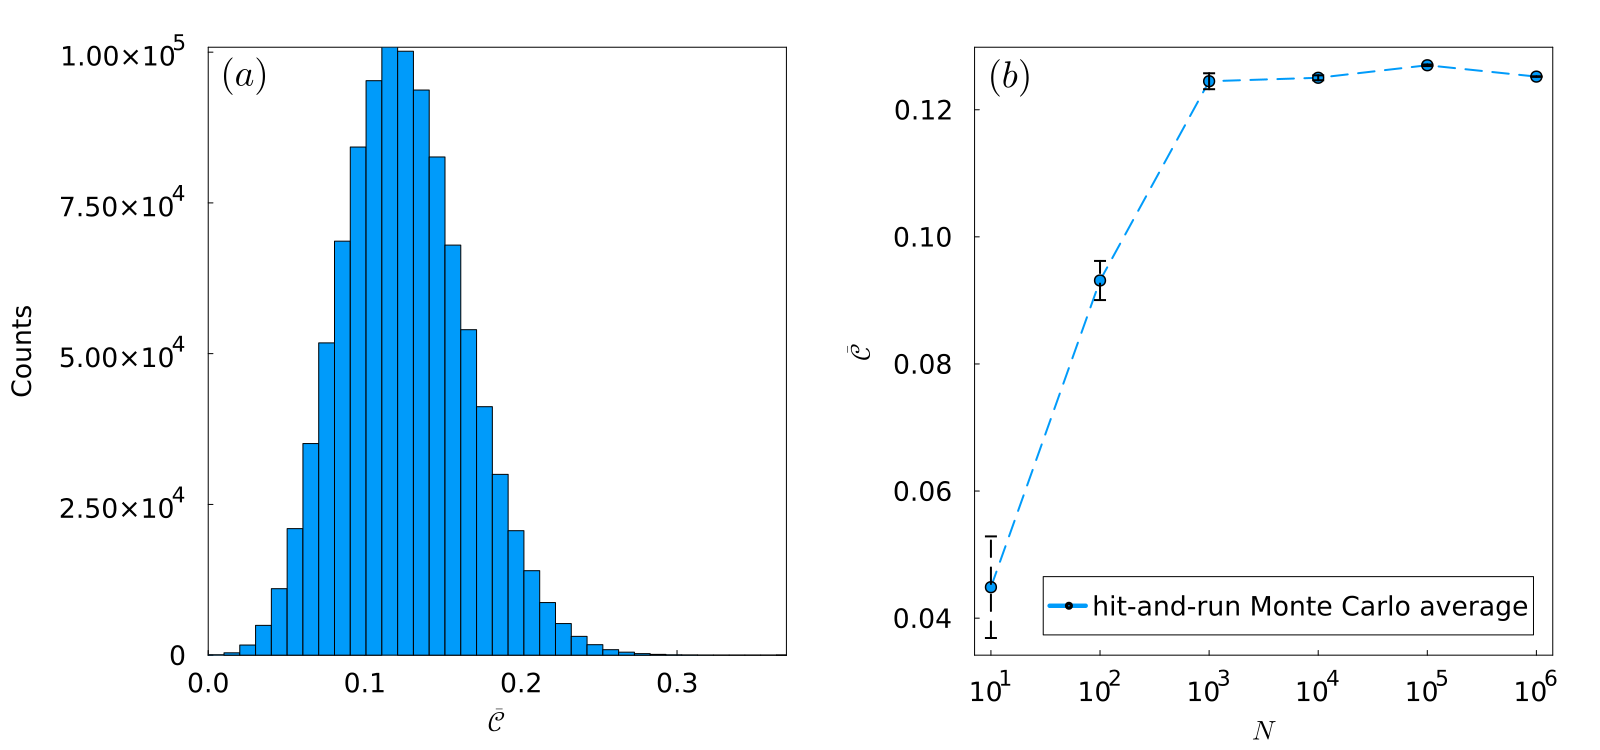

┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280
┌ Warning: Unused font arg: color (typeof(color))
└ @ Plots /home/francesco/.julia/packages/Plots/rz1WP/src/components.jl:280


In [100]:
# Histogram of the concurrence and Monte Carlo average convergence.

new_plot()
c_init = plot(all_plots[1], xtickfontsize=18,ytickfontsize=18, xguidefontsize=18,yguidefontsize=18,legendfontsize=12,
framestyle=:box)
xlabel!(L"\bar{\mathcal{C}}")
ylabel!("Counts")
xlims!(0, 0.37)
annotate!(0.04, 96000, text(L"(a)", color, :right, 25))
c_conv = plot(p_hr_convergence, xtickfontsize=18,ytickfontsize=18, xguidefontsize=18,yguidefontsize=18,legendfontsize=18)
xlabel!(L"N")
ylabel!(L"\bar{\mathcal{C}}")
annotate!(25, 0.125, text(L"(b)", color, :right, 25))
p_concurrence = plot(c_init, c_conv, layout=(1,2), size=(1600, 750), margin = 1Plots.cm)
savefig("fig4.pdf")
display(p_concurrence)